# Brazilian E-Commerce Public Dataset by Olist
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

## Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: olist website

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.


### Attention
 - An order might have multiple items.
 - Each item might be fulfilled by a distinct seller.
 - All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

## About data

The data is divided in multiple datasets for better understanding and organization.

Free dataset in [dataset in kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce)

# 1 : Lib

In [ ]:
import pandas as pd
import numpy as np

# ---- Operating system ----#
from os import path

!pip install wordcloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS


# ---- Data Vizualisation ---- #
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
!pip install folium --upgrade
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl

# ---- requests web ---- #
import requests
import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## 1.2 access to homemade function in google colab

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('custom_transformers.py','wb').write(src)

Saving custom_transformers.py to custom_transformers (2).py


69367

## 1.3 In other upload lib

In [ ]:
import custom_transformers

# 2 : Get data

**names of tables : For this task we have differente data sources, each one describing a specific topic related to e-commerce sales. The files are:**

  - olist_customers_dataset.csv
  - olist_geolocation_dataset.csv
  - olist_orders_dataset.csv
  - olist_order_items_dataset.csv
  - olist_order_payments_dataset.csv
  - olist_order_reviews_dataset.csv
  - olist_products_dataset.csv
  - olist_sellers_dataset.csv
  - product_category_name_translation.csv


In [ ]:
raw_path = "/content/drive/MyDrive/Colab Notebooks/segmentation_data/"

olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')

# 2.1 An Overview from the Data

In [ ]:
# Collections for each dataset
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments,
            olist_order_reviews, olist_products, olist_sellers]
            
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments',
         'olist_order_reviews', 'olist_products', 'olist_sellers']

# Creating a DataFrame with useful information about all datasets
data_info = pd.DataFrame({})
data_info['dataset'] = names
data_info['n_rows'] = [df.shape[0] for df in datasets]
data_info['n_cols'] = [df.shape[1] for df in datasets]
data_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
data_info['qty_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
data_info['null_columns'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

data_info

dataset  ...                                       null_columns
0        olist_customer  ...                                                   
1     olist_geolocation  ...                                                   
2          olist_orders  ...  order_approved_at, order_delivered_carrier_dat...
3     olist_order_items  ...                                                   
4  olist_order_payments  ...                                                   
5   olist_order_reviews  ...       review_comment_title, review_comment_message
6        olist_products  ...  product_category_name, product_name_lenght, pr...
7         olist_sellers  ...                                                   

[8 rows x 6 columns]

Well, we can now use the DataFrame above wherever we want to do dome data transformation or data analysis. It contains basically the main information about each column for each one of the datasets available. This is very useful!

In [ ]:
df_overview = pd.DataFrame({})

name_col = []
for name, df in zip(names, datasets):
    name_col += [name] * df.shape[1]
    df_overview = df_overview.append(custom_transformers.data_overview(df))
    df_overview['dataset_name'] = name_col

df_overview = df_overview.loc[:, ['dataset_name', 'feature', 'qtd_null', 'percent_null', 'dtype', 'qtd_cat']]
df_overview

dataset_name                        feature  ...    dtype  qtd_cat
0        olist_customer                    customer_id  ...   object    99441
1        olist_customer             customer_unique_id  ...   object    96096
2        olist_customer       customer_zip_code_prefix  ...    int64        0
3        olist_customer                  customer_city  ...   object     4119
4        olist_customer                 customer_state  ...   object       27
0     olist_geolocation    geolocation_zip_code_prefix  ...    int64        0
1     olist_geolocation                geolocation_lat  ...  float64        0
2     olist_geolocation                geolocation_lng  ...  float64        0
3     olist_geolocation               geolocation_city  ...   object     8011
4     olist_geolocation              geolocation_state  ...   object       27
0          olist_orders  order_delivered_customer_date  ...   object    95664
1          olist_orders   order_delivered_carrier_date  ...   object    81018
2          olist_orders              order_approved_at  ...   object    90733
3          olist_orders                       order_id  ...   object    99441
4          olist_orders                    customer_id  ...   object    99441
5          olist_orders                   order_status  ...   object        8
6          olist_orders       order_purchase_timestamp  ...   object    98875
7          olist_orders  order_estimated_delivery_date  ...   object      459
0     olist_order_items                       order_id  ...   object    98666
1     olist_order_items                  order_item_id  ...    int64        0
2     olist_order_items                     product_id  ...   object    32951
3     olist_order_items                      seller_id  ...   object     3095
4     olist_order_items            shipping_limit_date  ...   object    93318
5     olist_order_items                          price  ...  float64        0
6     olist_order_items                  freight_value  ...  float64        0
0  olist_order_payments                       order_id  ...   object    99440
1  olist_order_payments             payment_sequential  ...    int64        0
2  olist_order_payments                   payment_type  ...   object        5
3  olist_order_payments           payment_installments  ...    int64        0
4  olist_order_payments                  payment_value  ...  float64        0
0   olist_order_reviews           review_comment_title  ...   object     4527
1   olist_order_reviews         review_comment_message  ...   object    36159
2   olist_order_reviews                      review_id  ...   object    98410
3   olist_order_reviews                       order_id  ...   object    98673
4   olist_order_reviews                   review_score  ...    int64        0
5   olist_order_reviews           review_creation_date  ...   object      636
6   olist_order_reviews        review_answer_timestamp  ...   object    98248
0        olist_products          product_category_name  ...   object       73
1        olist_products            product_name_lenght  ...  float64        0
2        olist_products     product_description_lenght  ...  float64        0
3        olist_products             product_photos_qty  ...  float64        0
4        olist_products               product_weight_g  ...  float64        0
5        olist_products              product_length_cm  ...  float64        0
6        olist_products              product_height_cm  ...  float64        0
7        olist_products               product_width_cm  ...  float64        0
8        olist_products                     product_id  ...   object    32951
0         olist_sellers                      seller_id  ...   object     3095
1         olist_sellers         seller_zip_code_prefix  ...    int64        0
2         olist_sellers                    seller_city  ...   object      611
3         olist_sellers                   seller_state  ...   object       23

[50 rows x 6 columns]

# 3 : EDA 

So now we will go trough an exploratory data analysis to get insights from E-Commerce in Brazil. The aim here is to divide this session into topics so we can explore graphics for each subject (orders, customers, products, items, and others).

## 3.1 : Total orders on e-commerce

Looking at the dataset columns, we can see orders with different `status` and with different timestamp columns like `purchase`, `approved`, `delivered` and `estimated delivery`. First, let's look at the status of the orders we have in this dataset.

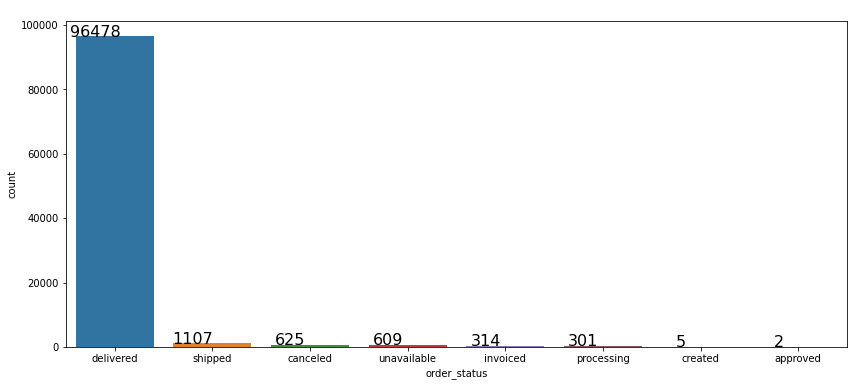

In [ ]:
df_orders = olist_orders.merge(olist_customer, how='left', on='customer_id')
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(data=df_orders, x='order_status', order=df_orders['order_status'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', color='black', size=16)
plt.show()

we will extract some information about the order_purchase_timestamp following the following topics:

  - Transforming the timestamp columns ;
  
  - Extract the temporal attributes of these date columns (year, month, day, day of the week and time) ;
  
  - Evaluate the e-commerce scenario using these attributes.

In [ ]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

order_id  ... order_purchase_time_day
0  e481f51cbdc54678b7cc49136f2d6af7  ...                 Morning
1  53cdb2fc8bc7dce0b6741e2150273451  ...                   Night
2  47770eb9100c2d0c44946d9cf07ec65d  ...                 Morning
3  949d5b44dbf5de918fe9c16f97b45f8a  ...                   Night
4  ad21c59c0840e6cb83a9ceb5573f8159  ...                   Night

[5 rows x 22 columns]

So now we can purpose a complete analysis on orders amount of brazilian e-commerce during the period of the dataset. For that let's plot three graphs using a `GridSpec` with the aim answear the following questions:

    - Is there any growing trend on brazilian e-commerce?
    - On what day of week brazilians customers tend to do online purchasing?
    - What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


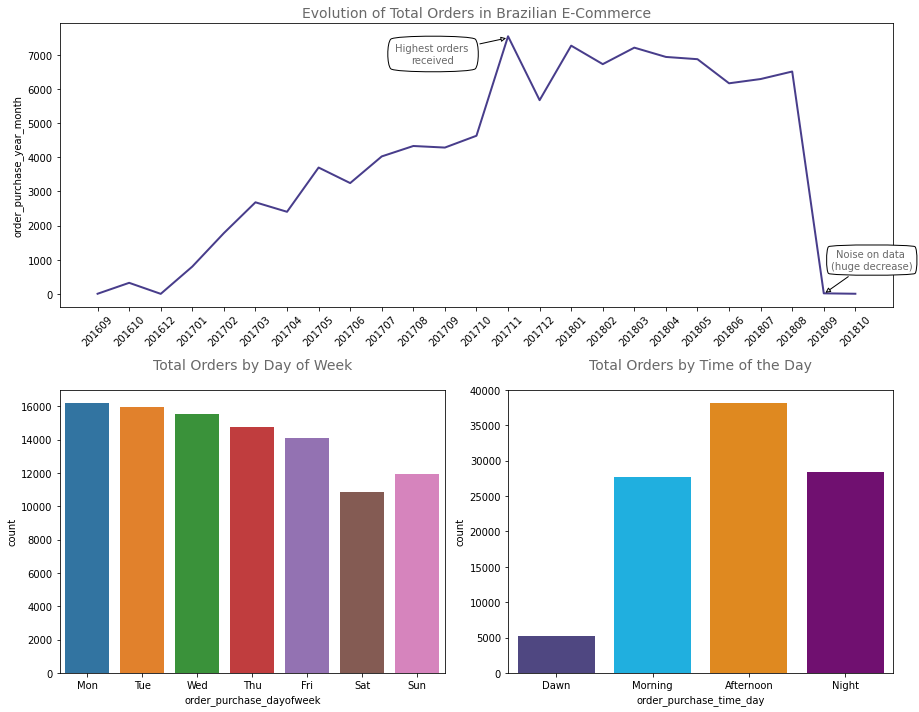

In [ ]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(data=df_orders, x="order_purchase_dayofweek", ax=ax2)
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
sns.countplot(data=df_orders, x='order_purchase_time_day', palette=day_color_list, ax=ax3)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

there are seasonal peaks, and Mondays and afternoons are the best times to shop online

**E-commerce: a comparison between 2017 and 2018**

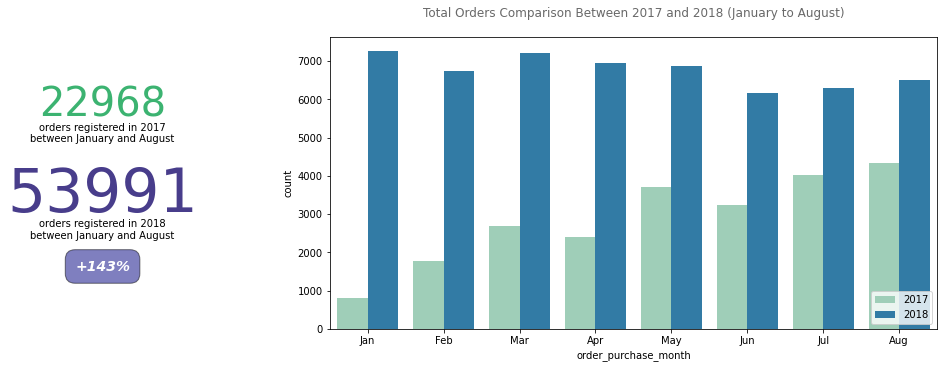

In [ ]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
df_orders_compare = df_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
sns.countplot(data=df_orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

## 3.2 : E-commerce Around Brazil

For preparing the data to a workaround analysis on brazilian's states e-commerce, we will take the following steps:

  - Merge the orders data to order_items data;
  
  - Use an API (brazilian government) to return the region of each customer_state;
  
  - Purpose useful charts to answear business questions.


* Brazilian APIs ans links for geolocation info:

        https://servicodados.ibge.gov.br/api/docs/localidades?versao=1

In [ ]:
# Merging orders and order_items
df_orders_items = df_orders.merge(olist_order_items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = olist_geolocation[olist_geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

order_id  ... geolocation_state
0  e481f51cbdc54678b7cc49136f2d6af7  ...                SP
1  53cdb2fc8bc7dce0b6741e2150273451  ...                BA
2  47770eb9100c2d0c44946d9cf07ec65d  ...                GO
3  949d5b44dbf5de918fe9c16f97b45f8a  ...                RN
4  ad21c59c0840e6cb83a9ceb5573f8159  ...                SP

[5 rows x 37 columns]

* **An overview of customer's order by region, state and city**


In [ ]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

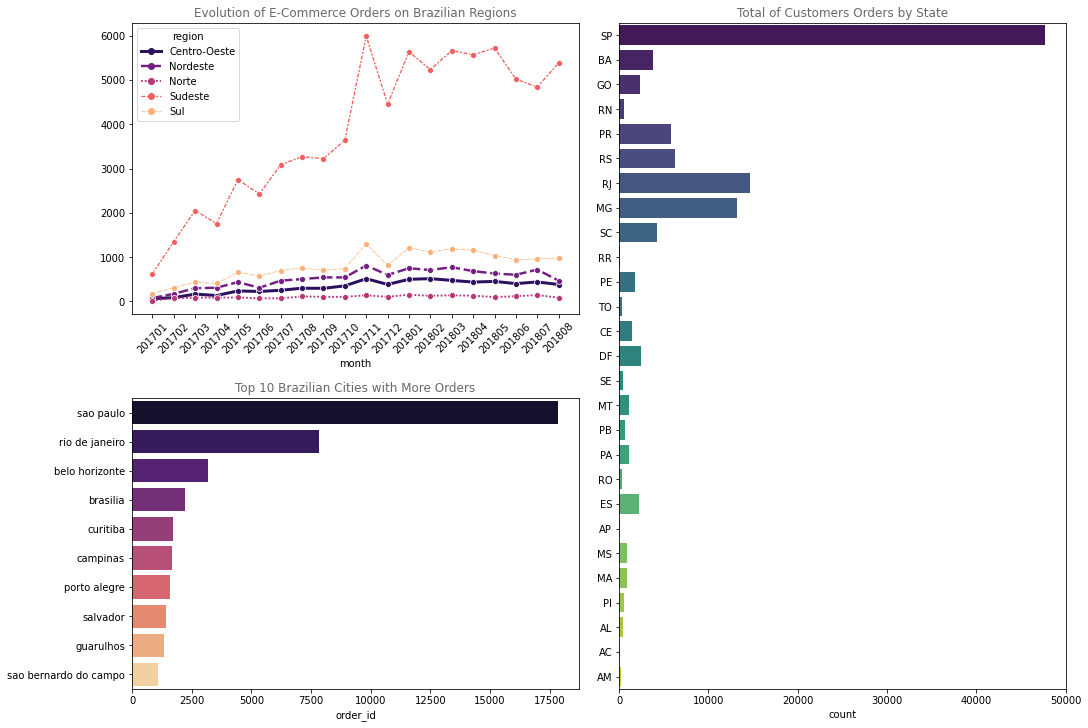

In [ ]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(x='month', y='order_count', ax=ax1, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top cities with more customers orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='magma')

ax2.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
ax2.set_ylabel('')

# Total orders by state
sns.countplot(data=df_orders_filt, y='customer_state', ax=ax3, palette='viridis')
ax3.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')

plt.show()

* **How customers are distributed in Brazil? (a 30k orders sample from 2018 in a map)**


In [ ]:
# Zipping locations
lats = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lat'].dropna().values)[:30000]
longs = list(df_orders_items.query('order_purchase_year == 2018')['geolocation_lng'].dropna().values)[:30000]
locations = list(zip(lats, longs))

# Creating a mapa using folium
map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

# Plugin: FastMarkerCluster
FastMarkerCluster(data=locations).add_to(map1)

map1


* **HeatMaps: a good view to see where are the core of brazilian e-commerce customers**

By the map we showed above, we have already the insight that the southeast of Brazil has the highest number of orders given through e-commerce. So, let's see it in a HeatMap!

In [ ]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_filt.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='map de chaleur',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

This can be seen here with a heat map

In [ ]:
epoch_list = []
heatmap_evl_data = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201801)]
heatmap_evl_data = heatmap_evl_data[(heatmap_evl_data['order_purchase_year_month'].astype(int) <= 201807)]
time_index = heatmap_evl_data['order_purchase_year_month'].sort_values().unique()
for epoch in time_index:
    data_temp = heatmap_evl_data.query('order_purchase_year_month == @epoch')
    data_temp = data_temp.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count()
    data_temp = data_temp.sort_values(by='order_id', ascending=False).iloc[:, :3]
    epoch_list.append(data_temp.values.tolist())
    
# Creating a mapa using folium
map2 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMapWithTime
HeatMapWithTime(
    name='Evolution of Orders in a Geolocation Perspective',
    data=epoch_list,
    radius=10,
    index=list(time_index)
).add_to(map2)

map2

## 3.3 E-Commerce Impact on Economy

Now, we will analyze the money movemented by e-commerce by looking at order prices, freights and others.


**How about the e-commerce sales? Did they grow up over time?**

For answear this question, let's first group our data in a way to look at the evolution overall.

In [ ]:
# Grouping data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

order_purchase_year  ... freight_per_order
0                 2017  ...         17.469586
1                 2017  ...         19.508308
2                 2017  ...         18.975432
3                 2017  ...         19.464223
4                 2017  ...         19.185778

[5 rows x 7 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


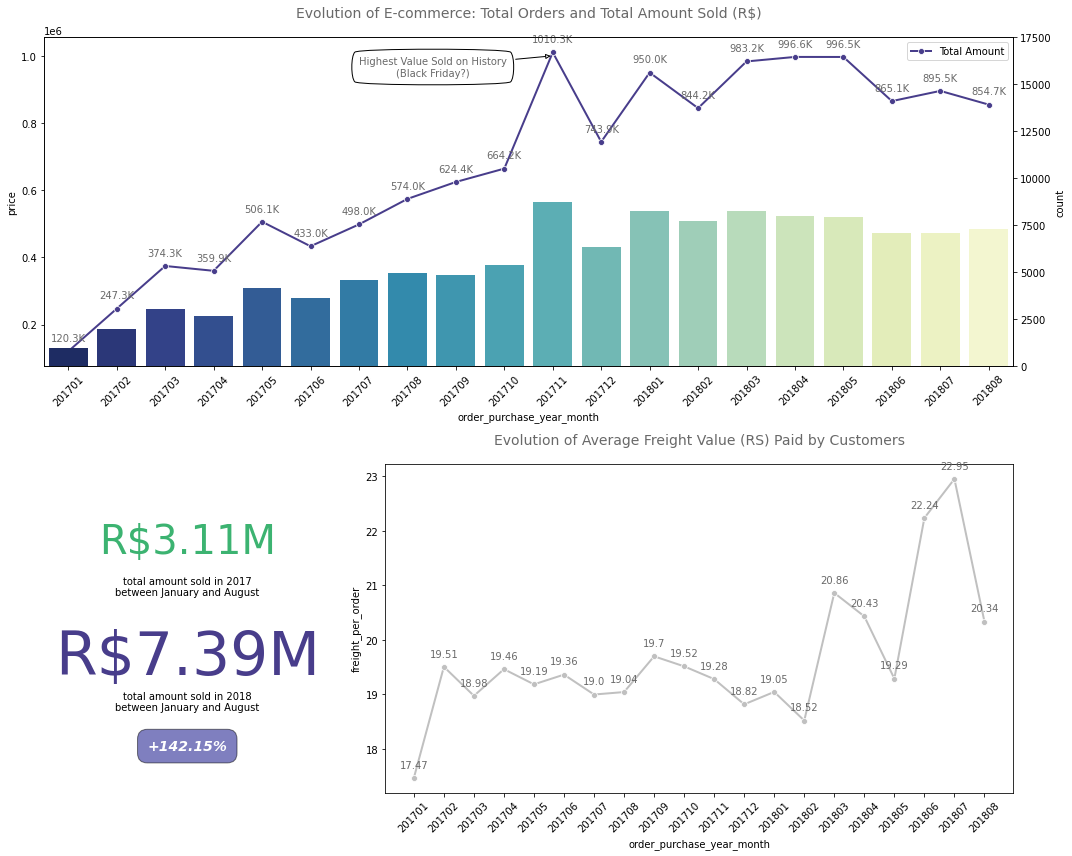

In [ ]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Plot 2 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708','201709','201710','201711','201712',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']

# Plot 1 - Evolution of total orders and total sales on e-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')
ax1_twx = ax1.twinx()
sns.countplot(data=df_orders_filt, x='order_purchase_year_month',order=month_comparison, ax=ax1_twx, palette='YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

# Plot 2 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
# Customizing the first plot
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax1.annotate(f'Highest Value Sold on History\n(Black Friday?)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=14, color='dimgrey', pad=20)

df_sales_compare = df_month_aggreg.query('order_purchase_year_month in (@month_comparison)')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = 1 + (sold_2017 / sold_2018)
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'total amount sold in 2017\nbetween January and August', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'total amount sold in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(100 * growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Plot 3 - Evolution of mean freight value paid by the customers
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='silver', marker='o', ax=ax3)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.freight_per_order.items():
    ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax3.set_title('Evolution of Average Freight Value (RS) Paid by Customers', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

* **How the total sales (sum of price) are concentraded in brazilian states?**

In [ ]:
def mean_sum_analysis(df, group_col, value_col, orient='vertical', palette='plasma', figsize=(15, 6)):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """

    # Grouping data
    df_mean = df.groupby(group_col, as_index=False).mean()
    df_sum = df.groupby(group_col, as_index=False).sum()

    # Sorting grouped dataframes
    df_mean.sort_values(by=value_col, ascending=False, inplace=True)
    sorter = list(df_mean[group_col].values)
    sorter_idx = dict(zip(sorter, range(len(sorter))))
    df_sum['mean_rank'] = df_mean[group_col].map(sorter_idx)
    df_sum.sort_values(by='mean_rank', inplace=True)
    df_sum.drop('mean_rank', axis=1, inplace=True)

    # Plotting data
    fig, axs = plt.subplots(ncols=2, figsize=figsize)
    if orient == 'vertical':
        sns.barplot(x=value_col, y=group_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=value_col, y=group_col, data=df_sum, ax=axs[1], palette=palette)
    elif orient == 'horizontal':
        sns.barplot(x=group_col, y=value_col, data=df_mean, ax=axs[0], palette=palette)
        sns.barplot(x=group_col, y=value_col, data=df_sum, ax=axs[1], palette=palette)

    # Customizing plot
    for ax in axs:
        ax.set_ylabel('')
    axs[0].set_title(f'Mean of {value_col} by {group_col}', size=14, color='dimgrey')
    axs[1].set_title(f'Sum of {value_col} by {group_col}', size=14, color='dimgrey')

    plt.tight_layout()
    plt.show()

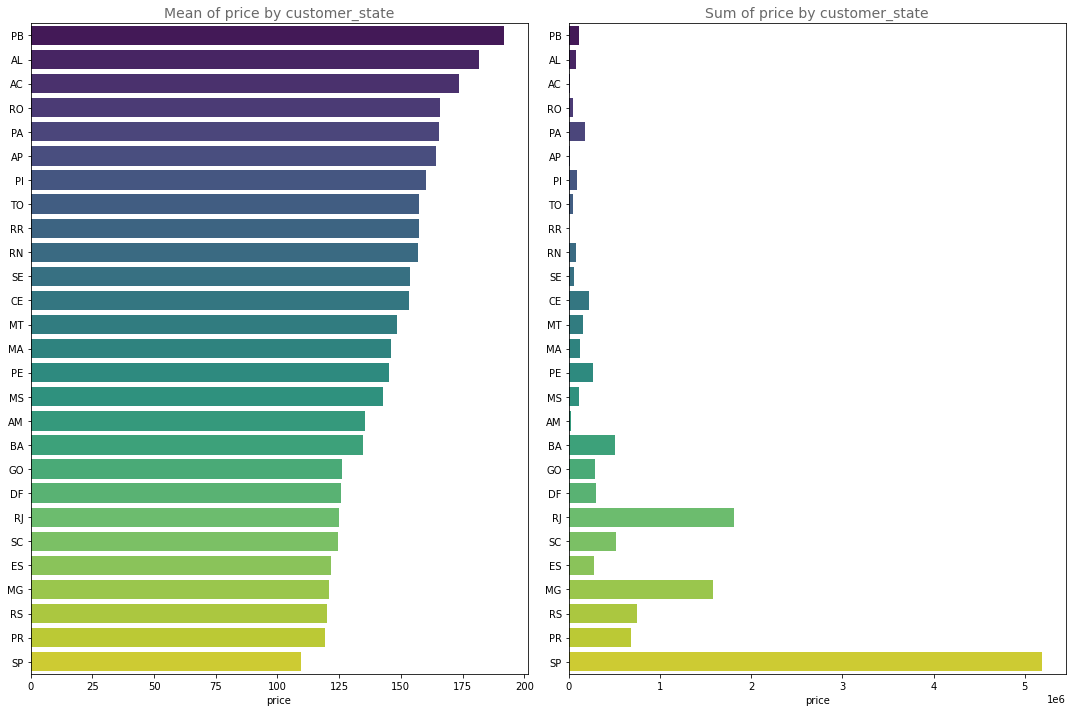

In [ ]:
mean_sum_analysis(df_orders_filt, 'customer_state', 'price', palette='viridis', figsize=(15, 10))

It's very interesting to see how some states have a high total amount sold and a low price per order. If we look at SP (São Paulo) for example, it's possible to see that it is the state with most valuable state for e-commerce (5,188,099 sold) but it is also where customers pay less per order (110.00 per order).

* **How about the freight?**

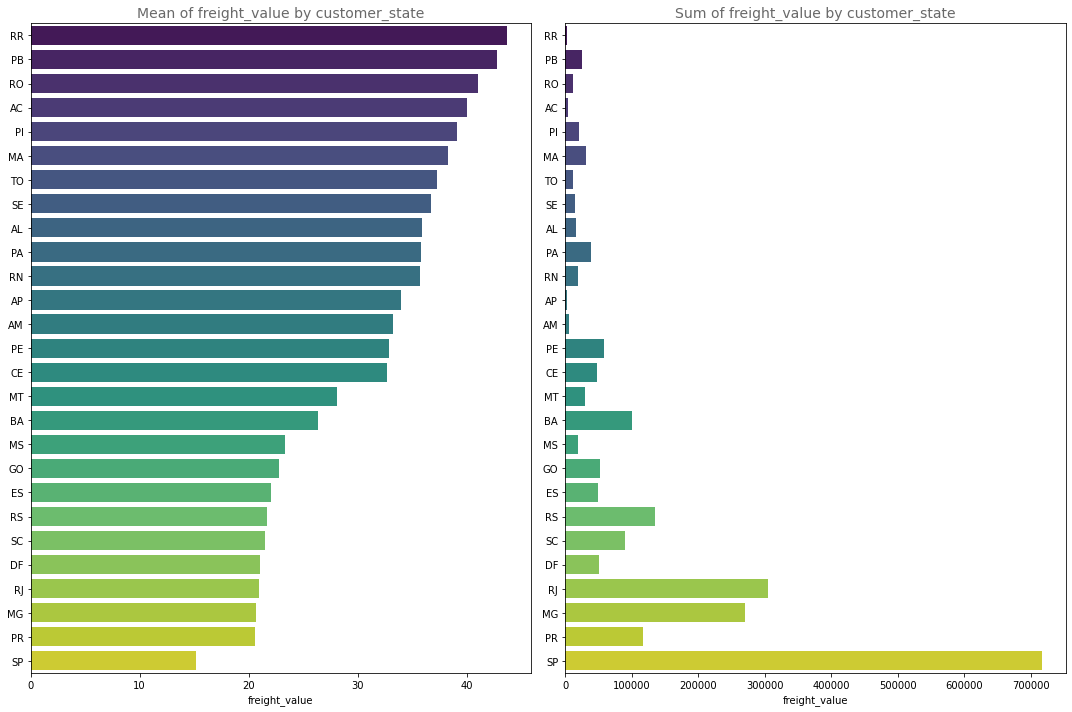

In [ ]:
mean_sum_analysis(df_orders_filt, 'customer_state', 'freight_value', palette='viridis', figsize=(15, 10))

Here we can get insights about the customers states with highest mean freight value. For example, customers in Roraima (RR), Paraíba (PB), Rondônia (RO) and Acre (AC) normaly pays more than anyone on freights.

## 3.4 Payment Type Analysis

One of the datasets provided have informations about order's payment. To see how payments can take influence on e-commerce, we can build a mini-dashboard with main concepts: payments type and payments installments. The idea is to present enough information to clarify how e-commerce buyers usually prefer to pay orders.


Boleto :
  - Is a payment method in Brazil regulated by FEBRABAN, short for Brazilian Federation of Banks

Voucher : 
  - Exchange coupon

  

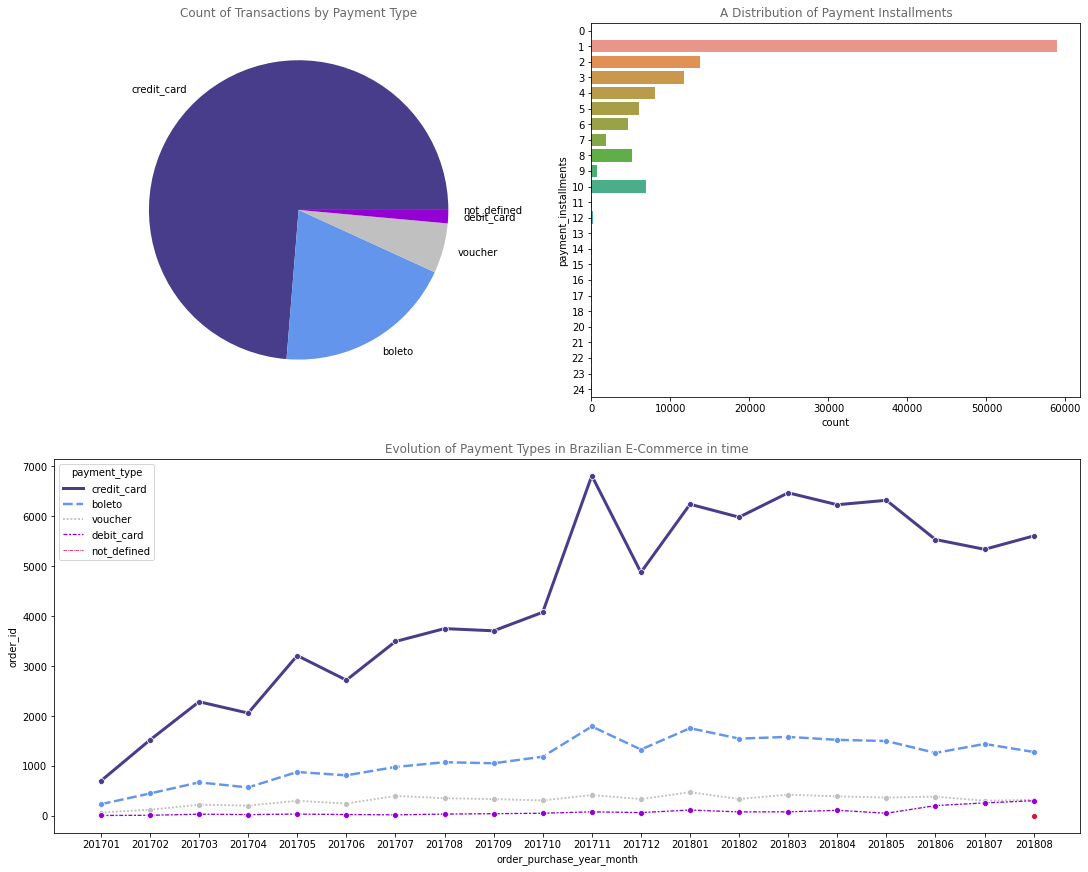

In [ ]:
# Grouping data
df_orders_pay = df_orders_filt.merge(olist_order_payments, how='left', on='order_id')

# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet', 'crimson']
label_names = df_orders_pay['payment_type'].value_counts()
ax1.pie(x=df_orders_pay['payment_type'].value_counts(), labels=label_names.index, colors=colors)
ax1.set_title('Count of Transactions by Payment Type', color='dimgrey', size=12)
# plt.show()
# donut_plot(df_orders_pay, col='payment_type', 

# Plot 2 - Payment installments
sns.countplot(data=df_orders_pay, ax=ax2, y='payment_installments')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)

# Plot 3 - Evolution of payment types
payment_evl = df_orders_pay.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
# format_spines(ax3, right_border=False)
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce in time', size=12, color='dimgrey')
plt.show()

At least, let's try to simulate a very neutral comment. Something like `I don't know if a liked this product. The cost was cheap but it was defectuous. If you're lucky, it worths`